# Using Our PySOM Library

## Import Modules

In [1]:
import os
import sys

# CHANGE LEVELS:
chdir = os.path.dirname(os.getcwd())
sys.path.insert(0, chdir)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

# PYSOM LIBRARY MODULES:
import pysom
from pysom.node import Node
from pysom.graph import Graph
from pysom.nodes.bmu import BMU
from pysom.nodes.dist import Dist
from pysom.nodes.concat import Concat
from pysom.nodes.calibrate import Calibrate
from pysom.nodes.som import SOM, nhood_mexican, nhood_bubble, nhood_gaussian, dist_manhattan, dist_cosine

## Default Node

    input -> node -> output


In [2]:
data = [
    [1, 3, 2],
    [1, 3, 2],
    [1, 3, 2]
]
data = np.array(data)

### CODE HERE ###

g = Graph()  # initialise Graph instance

node = g.create(Node)  # create Default node

g.connect(g.start, node, 1)  # connect Start node to Default node
# connect Default node to End node (Completes the Graph)
g.connect(node, g.end, 1)

g.set_input(data)  # set input data

print(g.get_output())  # get output


[[1 3 2]
 [1 3 2]
 [1 3 2]]


## Dist and Concat

                   *-> node1 ->*
                  /             \
                (1)              \
                /                 \
    input -> dist                 concat -> output
                \                 /
                (0,2)            /
                  \             /
                   *-> node2 ->*

In [3]:
data = [
    [1, 3, 2],
    [1, 3, 2],
    [1, 3, 2]
]
data = np.array(data)

### CODE HERE ###

g = Graph()  # initialise Graph instance

sel = [(1, [0, 2]), (1, [1])]  # selection(1): dimensions at index 0, 2
# selection(2): dimensions at index 1

# create Dist node and provide selections
dist = g.create(Dist, {'selections': sel})

g.connect(g.start, dist, 1)  # connect Start node to Distribute node

node1 = g.create(Node)  # create Default node 1
node2 = g.create(Node)  # create Default node 2

# connect Dist node to Default node 1 < sends selection(1) >
g.connect(dist, node1, 1)
# connect Dist node to Default node 2 < sends selection(2) >
g.connect(dist, node2, 2)

# create Concat node and select axis < axis = 1: concatenates column-wise >
con = g.create(Concat, {'axis': 1})

g.connect(node1, con, 1)  # connect Default node 1 to Concat node
g.connect(node2, con, 1)  # connect Default node 2 to Concat node

# connect Concat node to End node (Completes the Graph)
g.connect(con, g.end, 1)

g.set_input(data)  # set input data

print(g.get_output())  # get output


[[1 2 3]
 [1 2 3]
 [1 2 3]]


# Example Usage: SOM Calibrated on Animal Data

  
    animal 
          \
           SOM
             \
              calibrate(labels) -> output

### Load Animal Data

In [4]:
animal = ['Dove', 'Chicken', 'Duck', 'Goose', 'Owl', 'Hawk', 'Eagle', 'Fox', 'Dog', 'Wolf', 'Cat', 'Tiger', 'Lion', 'Horse', 'Zebra', 'Cow']
features = [
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],    # Dove
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],    # Chicken
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1],    # Duck
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1],    # Goose
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],    # Owl
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],    # Hawk
    [0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],    # Eagle
    [0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],    # Fox
    [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],    # Dog
    [0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0],    # Wolf
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],    # Cat
    [0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0],    # Tiger
    [0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0],    # Lion
    [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0],    # Horse
    [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0],    # Zebra
    [0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]     # Cow
]

feats = pd.DataFrame(features)
feats.columns = ['Small', 'Medium', 'Big', '2-legs', '4-legs', 'Hair', 'Hooves', 'Mane', 'Feathers', 'Hunt', 'Run', 'Fly', 'Swim']
feats

,Small,Medium,Big,2-legs,4-legs,Hair,Hooves,Mane,Feathers,Hunt,Run,Fly,Swim
0,1,0,0,1,0,0,0,0,1,0,0,1,0
1,1,0,0,1,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,1,0,0,0,1
3,1,0,0,1,0,0,0,0,1,0,0,1,1
4,1,0,0,1,0,0,0,0,1,1,0,1,0
5,1,0,0,1,0,0,0,0,1,1,0,1,0
6,0,1,0,1,0,0,0,0,1,1,0,1,0
7,0,1,0,0,1,1,0,0,0,1,0,0,0
8,0,1,0,0,1,1,0,0,0,0,1,0,0
9,0,1,0,0,1,1,0,1,0,1,1,0,0


### Helper Plot Function

In [5]:
plt.rcParams["figure.figsize"] = (14, 7)

def plot_features(size, out):
    for bmu, labels in out.items():
        labels = list(labels)
        print(labels)

        for i in range(len(labels)):
            plt.text(bmu[0] + 0.1, bmu[1] + (i + 1) / len(labels) - 0.35, labels[i], fontsize=15)

    plt.xticks(np.arange(size + 1))
    plt.yticks(np.arange(size + 1))
    plt.grid()
    plt.show()

## Train Single SOM on Animal Data



    animal 
          \
           SOM
             \
              calibrate(labels) -> output

['Dove', 'Chicken', 'Duck', 'Goose']
['Owl', 'Hawk']
['Eagle']
['Fox', 'Dog', 'Wolf']
['Cat']
['Tiger']
['Lion']
['Horse', 'Zebra']
['Cow']


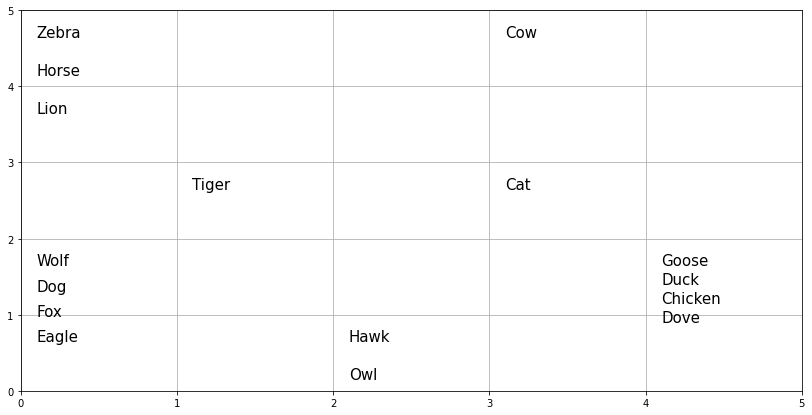

In [6]:
### CODE HERE ###

g = Graph()  # initialise Graph instance

size = 5  # select SOM grid size < size = 5: creates a 5 x 5 grid >

# create SOM node and customize parameters
som = g.create(SOM, props={'size': size, 'dim': 13,
               "nhood": nhood_mexican, 'sigma': 13, 'lr': 0.8, 'n_iters': 10000})

g.connect(g.start, som, 1)  # connect Start node to SOM node

# create Calibrate node and provide labels to fit on data
cal = g.create(Calibrate, props={"labels": animal})

g.connect(som, cal, 0)  # connect SOM node to Calibrate node < output self >
# connect Calibrate node to End node (Completes the Graph)
g.connect(cal, g.end, 1)

data = scale(feats.values)

g.set_input(data)  # set input data

out = g.get_output()  # get output
plot_features(size, out)  # use helper function to visualize label mapping
